In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
cifar10 = pd.read_csv("cifar10_standard.csv")
cifar10

,accuracy_cifar10
0,0.1000
1,0.1012
2,0.1000
3,0.0987
4,0.1007
...,...
107,0.5150
108,0.4925
109,0.5207
110,0.5410


In [3]:
cifar10.count()

accuracy_cifar10    112
dtype: int64

In [4]:
svhn = pd.read_csv("svhn_standard.csv")
svhn

,no_defense_accuracy,defense_accuracy
0,0.110710,0.144284
1,0.110710,0.624078
2,0.110710,0.795098
3,0.110710,0.880801
4,0.110710,0.889367
5,0.110710,0.915527
6,0.110710,0.919484
7,0.110710,0.924900
8,0.121120,0.926514
9,0.166142,0.930086


In [5]:
svhn.count()

no_defense_accuracy    12
defense_accuracy       12
dtype: int64

In [6]:
print(svhn.head())

   no_defense_accuracy  defense_accuracy
0              0.11071          0.144284
1              0.11071          0.624078
2              0.11071          0.795098
3              0.11071          0.880801
4              0.11071          0.889367


### Second Attack - CIFAR-10

In [7]:
cifar10["accuracy_cifar10"] *= 100
cifar10

,accuracy_cifar10
0,10.00
1,10.12
2,10.00
3,9.87
4,10.07
...,...
107,51.50
108,49.25
109,52.07
110,54.10


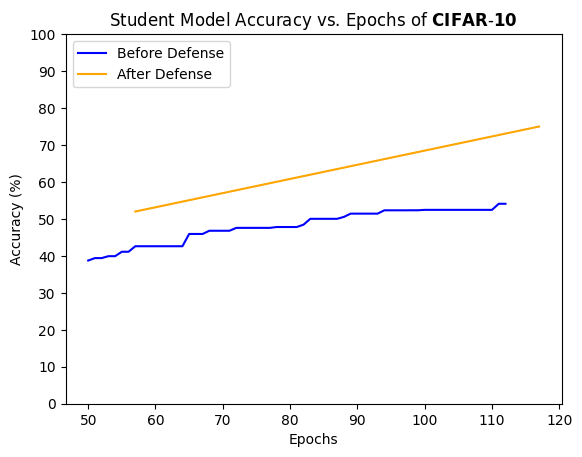

In [8]:
# Define x and y for the plot directly from cifar10
x = [i for i in range(50, len(cifar10) + 1)]
y = [max(cifar10["accuracy_cifar10"][:i]) for i in range(50, len(cifar10) + 1)]

# Define the points for defense vs. no defense comparison
x1 = [57, 117]
y1 = [52, 75]  # Already in percentage

# Plotting the graph
plt.plot(x, y, label="Before Defense", color="blue")
plt.plot(x1, y1, label="After Defense", color="orange")


# Adding title and labels
plt.title("Student Model Accuracy vs. Epochs of " + r"$\bf{CIFAR\text{-}10}$")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Before Defense", "After Defense"], loc="upper left")

# Set the Y-axis ticks to range from 0 to 100 with a step of 10
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)

# Save the chart as a PNG image
plt.savefig("Second_cifar10.png", dpi=300)  # Save the image with the updated file name
# Display the plot
plt.show()

### Second Attack - SVHN

In [9]:
svhn["no_defense_accuracy"] = svhn["no_defense_accuracy"] * 100
svhn["defense_accuracy"] = svhn["defense_accuracy"] * 100
svhn

,no_defense_accuracy,defense_accuracy
0,11.070990,14.428396
1,11.070990,62.407806
2,11.070990,79.509834
3,11.070990,88.080055
4,11.070990,88.936693
5,11.070990,91.552704
6,11.070990,91.948371
7,11.070990,92.490012
8,12.112016,92.651352
9,16.614167,93.008605


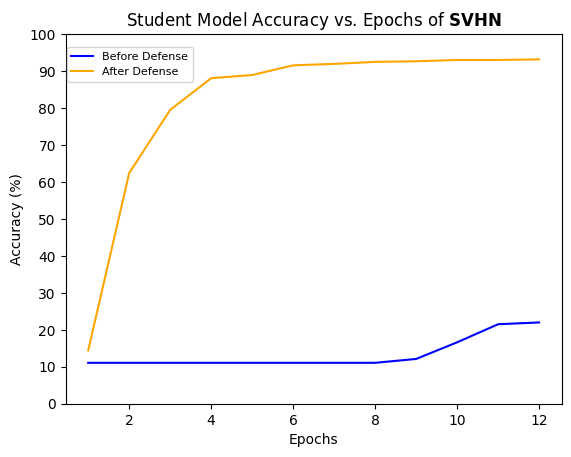

In [10]:
# Generate x-axis values
x_no_defense = [i for i in range(1, len(svhn["no_defense_accuracy"]) + 1)]
y_no_defense = [
    max(svhn["no_defense_accuracy"][:i])
    for i in range(1, len(svhn["no_defense_accuracy"]) + 1)
]

x_defense = [i for i in range(1, len(svhn["defense_accuracy"]) + 1)]
y_defense = [
    max(svhn["defense_accuracy"][:i])
    for i in range(1, len(svhn["defense_accuracy"]) + 1)
]

# Plotting the graph
plt.plot(x_no_defense, y_no_defense, label="Before Defense", color="blue")
plt.plot(x_defense, y_defense, label="After Defense", color="orange")

# Adding title and labels
plt.title("Student Model Accuracy vs. Epochs of " + r"$\bf{SVHN}$")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

# Set the Y-axis ticks dynamically
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)

# Adjust the legend size and position to avoid overlap
plt.legend(
    loc="upper left",  # Top-left corner
    fontsize=8,  # Smaller font size
    bbox_to_anchor=(-0.009, 0.98),  # Shift legend further to the left
    frameon=True,  # Add a border for readability
)

# Save the chart as a PNG image
plt.savefig("Second_svhn.png", dpi=300)  # Save the image with the updated file name
# Display the plot
plt.show()

### Combine two plots side by side

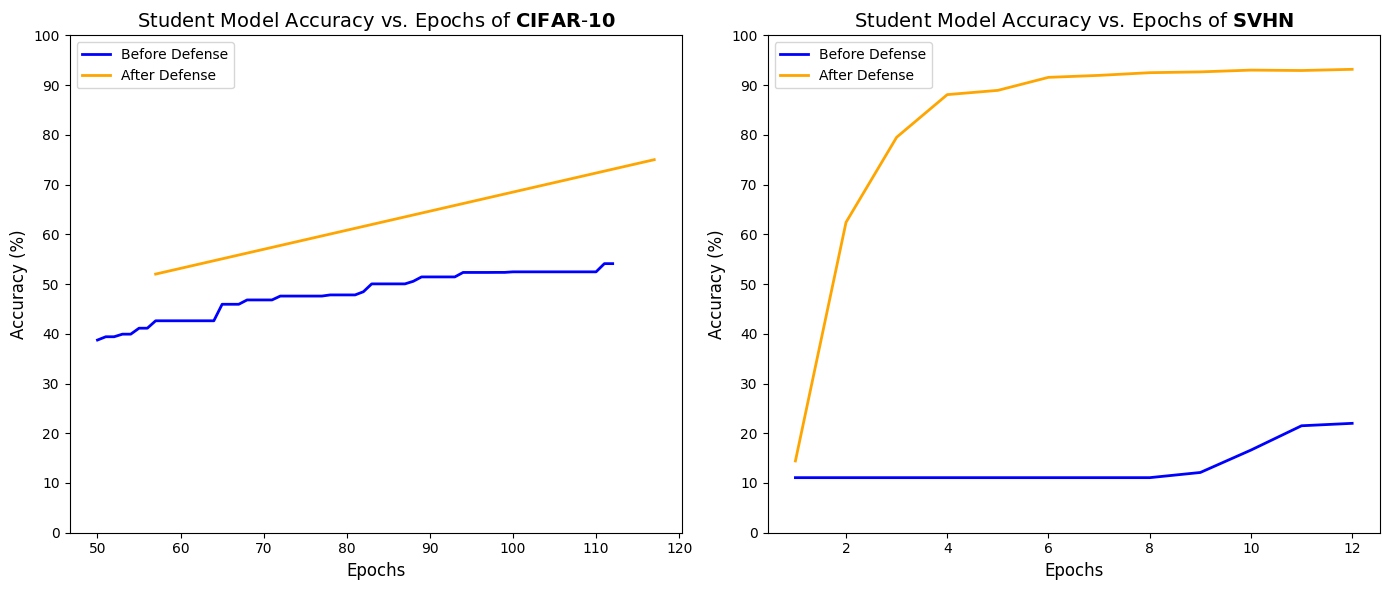

In [14]:
# Define CIFAR-10 variables
x_cifar10 = [i for i in range(50, 113)]  # Epochs for CIFAR-10 (50 to 112)
# y_cifar10 = [
#     max(cifar10["accuracy_cifar10"][:i]) * 100 for i in range(1, len(cifar10) + 1)
# ]  # Scale to percentage

y_cifar10 = [
    3874.0,
    3940.0,
    3940.0,
    3992.0,
    3992.0,
    4112.0,
    4112.0,
    4261.0,
    4261.0,
    4261.0,
    4261.0,
    4261.0,
    4261.0,
    4261.0,
    4261.0,
    4593.0,
    4593.0,
    4593.0,
    4680.0,
    4680.0,
    4680.0,
    4680.0,
    4758.0,
    4758.0,
    4758.0,
    4758.0,
    4758.0,
    4758.0,
    4781.0,
    4781.0,
    4781.0,
    4781.0,
    4845.0,
    5002.9,
    5002.9,
    5002.9,
    5002.9,
    5002.9,
    5055.0,
    5143.0,
    5143.0,
    5143.0,
    5143.0,
    5143.0,
    5233.0,
    5233.0,
    5233.0,
    5233.0,
    5234.0,
    5234.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5245.0,
    5410.0,
    5410.0,
]  # Before defense
x1_cifar10 = [57, 117]  # Epochs for After Defense
y1_cifar10 = [52, 75]  # Already percentages

# Define SVHN variables
x_svhn_no_defense = [i for i in range(1, 13)]  # Epochs for SVHN (No Defense)
y_svhn_no_defense = svhn["no_defense_accuracy"]  # Before defense

x_svhn_defense = [i for i in range(1, 13)]  # Epochs for Defense
# y_svhn_defense = [
#     max(svhn["defense_accuracy"][:i]) * 100 for i in range(1, len(svhn) + 1)
# ]
y_svhn_defense = svhn["defense_accuracy"]  # After defense

# Corrected Code for Combined Plot

# Normalize and scale CIFAR-10 y values to percentages
y_cifar10_scaled = [val / 1e4 * 100 for val in y_cifar10]  # Normalize and scale
y1_cifar10_scaled = [val for val in y1_cifar10]  # These are already percentages

# SVHN values are already percentages
y_svhn_no_defense_scaled = [val for val in y_svhn_no_defense]
y_svhn_defense_scaled = [val for val in y_svhn_defense]

# Plot side-by-side graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# CIFAR-10 Plot
axes[0].plot(
    x_cifar10, y_cifar10_scaled, color="blue", label="Before Defense", linewidth=2
)
axes[0].plot(
    x1_cifar10, y1_cifar10_scaled, color="orange", label="After Defense", linewidth=2
)
axes[0].set_title(
    "Student Model Accuracy vs. Epochs of " + r"$\bf{CIFAR\text{-}10}$", fontsize=14
)
axes[0].set_xlabel("Epochs", fontsize=12)
axes[0].set_ylabel("Accuracy (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Set Y-axis range to 0-100 for comparison
axes[0].set_yticks(range(0, 101, 10))  # Set ticks at intervals of 10
axes[0].legend(loc="upper left", fontsize=10)

# SVHN Plot
axes[1].plot(
    x_svhn_no_defense,
    y_svhn_no_defense_scaled,
    color="blue",
    label="Before Defense",
    linewidth=2,
)
axes[1].plot(
    x_svhn_defense,
    y_svhn_defense_scaled,
    color="orange",
    label="After Defense",
    linewidth=2,
)
axes[1].set_title("Student Model Accuracy vs. Epochs of " + r"$\bf{SVHN}$", fontsize=14)
axes[1].set_xlabel("Epochs", fontsize=12)
axes[1].set_ylabel("Accuracy (%)", fontsize=12)
axes[1].set_ylim(0, 100)  # Set Y-axis range to 0-100 for comparison
axes[1].set_yticks(range(0, 101, 10))  # Set ticks at intervals of 10
axes[1].legend(loc="upper left", fontsize=10)

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig("Combined_CIFAR10_SVHN.png", dpi=300)
plt.show()